In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python3)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: build: File exists
-- The C compiler identification is AppleClang 11.0.3.11030032
-- The CXX compiler identification is AppleClang 11.0.3.11030032
-- Check for working C compiler: /Library/Developer/CommandLineTools/usr/bin/cc
-- Check for working C compiler: /Library/Developer/CommandLineTools/usr/bin/cc - works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /Library/Developer/CommandLineTools/usr/bin/c++
-- Check for working CXX compiler: /Library/Developer/CommandLineTools/usr/bin/c++ - works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /usr/local/bin/python3 (found version "3.7.7") 
-- Found PythonLibs: /usr/local/opt/python/Frameworks/Python.framework/Versions/3.7/lib/libpython3.7m.dylib
-- pybind11 v2.5

In [1]:
import math 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum

/Users/mariano.benzo/Facultad/Metodos/TP3/metnum-tp3/notebooks
Python 2.7.16


In [3]:
df = pd.read_csv('../data/train.csv')
df = df[df['ciudad']=='Mérida'].dropna()
x = df['metroscubiertos'].values
y = df['precio'].values
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)

In [4]:

"""
Reemplazar por nuestra implementación 
"""

#linear_regressor = LinearRegression()
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(x,y)

In [5]:
df['prediction'] = linear_regressor.predict(x)

df['prediction']

263       1.023693e+06
967       1.114665e+06
2002      1.442161e+06
2193      9.236251e+05
3656      1.869728e+06
              ...     
238252    1.105568e+06
238595    1.369385e+06
238761    1.678688e+06
239568    8.872365e+05
239785    1.669591e+06
Name: prediction, Length: 518, dtype: float64

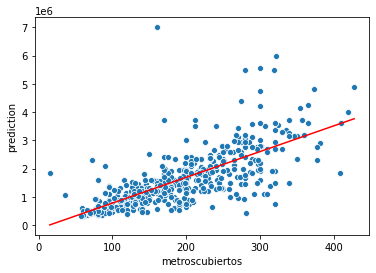

In [6]:
sns.scatterplot(data=df, x='metroscubiertos', y='precio')
sns.lineplot(data=df, x='metroscubiertos', y='prediction', color='red')

In [7]:
dft = pd.read_csv('../data/test.csv')
dft = dft[dft['ciudad']=='Mérida'].dropna()
dft['precio'] = 0.0
xt = dft['metroscubiertos'].values
xt = xt.reshape(len(xt),1)

In [10]:
dft['prediction'] = linear_regressor.predict(xt)

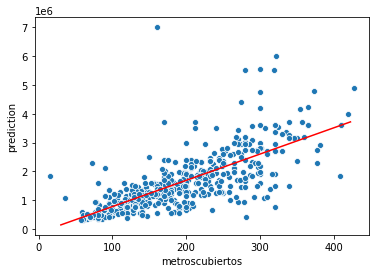

In [11]:
sns.scatterplot(data=df, x='metroscubiertos', y='precio')
sns.lineplot(data=dft, x='metroscubiertos', y='prediction', color='red')

## K-Fold Cross-Validation

In [3]:
def splitTrainSet(x, y, K, i):
    size = int(df.shape[0] * 1/K)
    
    x_train1 = x[:i * size]
    x_train2 = x[(i + 1) * size:]
    x_train = np.concatenate((x_train1, x_train2))
    x_test = x[i * size:(i + 1) * size]
    
    y_train1 = y[:i * size]
    y_train2 = y[(i + 1) * size:]
    y_train = np.concatenate((y_train1, y_train2))
    y_test = y[i * size:(i + 1) * size]
    
    return x_train, y_train, x_test, y_test

In [4]:
from sklearn.linear_model import LinearRegression

def linearRegressionKFold(x, y, K):
    
    RMSError = []
    RMSLError = []
    
    for i in range(0, K):
        x_train, y_train, x_test, y_test = splitTrainSet(x, y, K, i)
                
        #linear_regressor = metnum.LinearRegression()
        linear_regressor = LinearRegression()

        linear_regressor.fit(x_train, y_train)
        
        y_pred = linear_regressor.predict(x_test)
        
        e = RMSE(y_test, y_pred)
        le = RMSLE(y_test, y_pred)

        RMSError.append(e)
        RMSLError.append(le)

    RMSError = np.mean(RMSError)
    RMSLError = np.mean(RMSLError)

    return RMSError, RMSLError

## RMSE & RMSLE

In [9]:
def RMSE(y_test, y_pred):
    n = len(y_test)
    return math.sqrt(sum([(y_test[i] - y_pred[i])**2 for i in range(0, n)]) / n)

In [10]:
def RMSLE(y_test, y_pred):
    n = len(y_test)
    return math.sqrt(sum([(math.log(y_test[i] + 1) - (math.log(y_pred[i] + 1)))**2 for i in range(0, n)]) / n)

## Experimentacion

In [30]:
df_train = pd.read_csv('../data/train.csv')
df_train = df_train[df_train['ciudad']=='Mérida'].dropna()

df_test = pd.read_csv('../data/test.csv')
df_test = df_test[df_test['ciudad']=='Mérida'].dropna()

In [31]:
x = df_train['metroscubiertos'].values
y = df_train['precio'].values
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)

In [32]:
K = 5
linearRegressionKFold(x, y, K)

(669744.8439408364, 0.41708473418241887)

In [33]:
linear_regressor = LinearRegression()
linear_regressor.fit(x,y)

x = df_test['metroscubiertos'].values
x = x.reshape(len(x),1)
df_test['prediction'] = linear_regressor.predict(x)

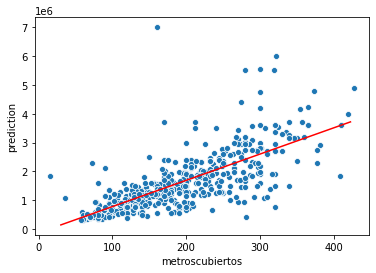

In [34]:
sns.scatterplot(data=df_train, x='metroscubiertos', y='precio')
sns.lineplot(data=df_test, x='metroscubiertos', y='prediction', color='red')